# What are the top 5 zipcodes in the US that a real estate firm should invest in?

## Questions to consider from Julian: 
- how do we want to briing things together? pool zip codes together, make a general model trained on all zipcodes & tested on one of the zipcode

- we can do arima modelss & control for staionarity, but are we going to put anything else into it? are there other data points in the date we have to make our predictions better

- trainn test split --> cut off a year or two or three

- suggestions: bin zip codes? maybe by state, by urban or suburban or by metro area now maybe join the mini zip codes!! specify which zip code is which justify it! these are the largest/most urban zips in the dataset

- note: there is value in just a forecast, we can assume you are already invested in this zip code and what should they do?

- we could grouby for the metro areas

# Imports and Load in Data


In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline



In [3]:
#read in data
df = pd.read_csv('zillow_data.csv.zip')
df.head(30)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


# Check Data for Null Values

In [7]:
df['City'].value_counts()

New York       114
Los Angeles     95
Houston         88
San Antonio     48
Washington      45
              ... 
Point            1
Wartburg         1
Dade City        1
Chewelah         1
Manteo           1
Name: City, Length: 7554, dtype: int64

In [3]:
df['City'].isna().value_counts()

False    14723
Name: City, dtype: int64

In [ ]:
df['State'].isna().value_counts()

In [ ]:
#will probably want to drop these nulls since the number of values thatt are missing is not a huge portion of the data, we should be able to drop them without any major issues
df['Metro'].isna().value_counts()

In [ ]:
df['CountyName'].isna().value_counts()

In [ ]:
df['SizeRank'].isna().value_counts()

In [ ]:
#we have some missing here too
df['1996-04'].isna().value_counts()

In [ ]:
df['1996-05'].isna().value_counts()

In [ ]:
df['1996-06'].isna().value_counts()

In [ ]:
# it looks like we might have the same missing values for all the years
df['1996-07'].isna().value_counts()

In [ ]:
df['2000-02'].isna().value_counts()

In [ ]:
#hmmm or maybe not 
df['2018-01'].isna().value_counts()


In [ ]:
#so now we can see we have a lot of null values for past years and the Metro column; we can go ahead and drop them since roughly 1050 values out of 13700 is not a huge portion
pd.options.display.min_rows = 272

df.isnull().sum().sort_values(ascending=False)

In [ ]:
#let's go ahead and drop all the null values 
df = df.copy()
df.dropna(inplace = True)

In [ ]:
#awesome, now that our nulls are gone we can go ahead and filter for the 10% of zipcodes with respect to size_rank 
sr_10 = df.SizeRank.quantile(q=.10)
zip_5 = df[df['SizeRank']<sr_10]
zip_5.head()

# Lets try binning things by Metro/Zip/SizeRank"?


In [ ]:
df['Metro'].value_counts()
#looks like there are over 600 unique Metro areas .... i'm not sure how we go about binning these


# Convert  Date Columns  to Date Time Objects

In [9]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [10]:
#converting the dataframe without nulls to datetime
get_datetimes(df)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [11]:
 df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Reshape from Wide to Long Format

In [8]:


def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [12]:
#first we will make individual dataframes for each zipcode area 
df_melt = melt_data(df)
df_melt.head()

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


# Let's check for stationarity

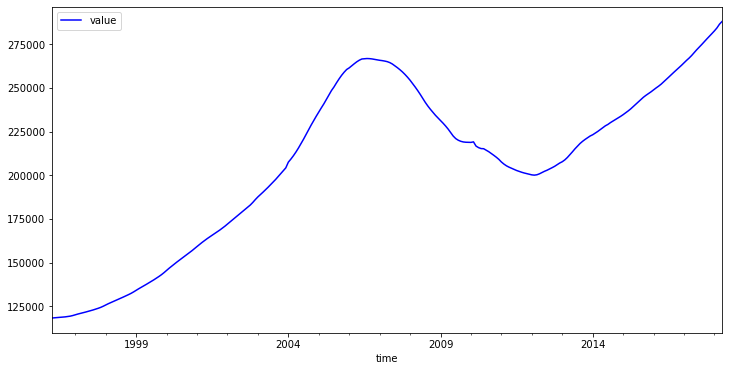

In [10]:
df_melt.plot(figsize=(12,6), color='blue');
#ok so clearly the data is not stationary

In [14]:
#shout out to flatiron school for this helper function 
def stationarity_check(df_melt):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = df_melt.rolling(window=8, center=False).mean()
    roll_std = df_melt.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(df_melt['value'])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(df_melt, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

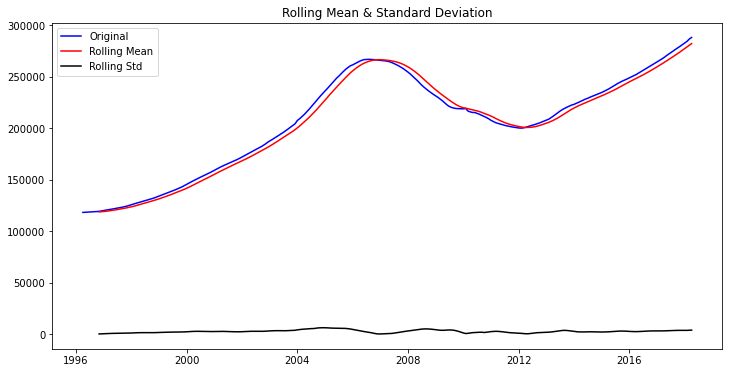

Results of Dickey-Fuller Test: 

Test Statistic                  -1.885145
p-value                          0.339082
#Lags Used                       2.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


In [15]:
stationarity_check(df_melt)
#again we see the data is not stationry; the p-value needs to be below our critical value of 0.05

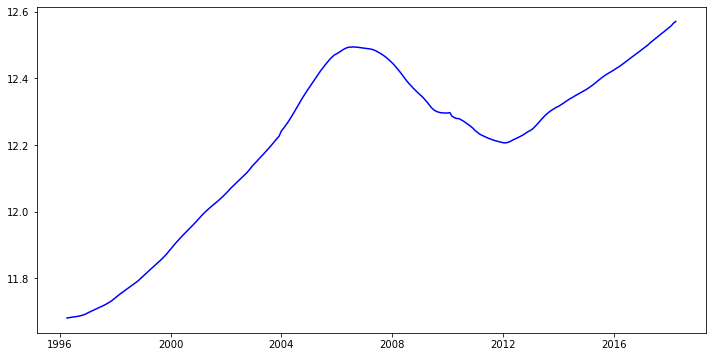

In [16]:
# let's do a log transformation 
df_log = np.log(df_melt)
fig = plt.figure(figsize=(12,6))
plt.plot(df_log, color='blue');

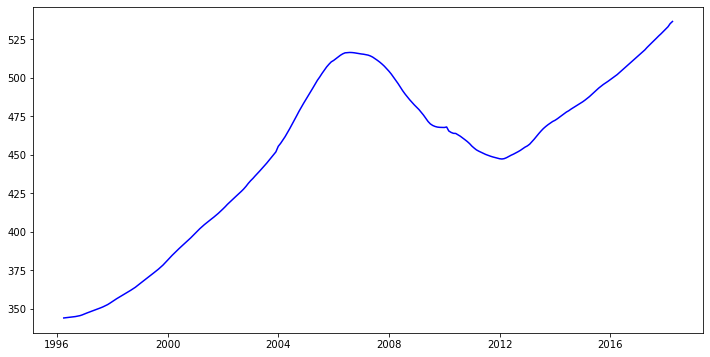

In [17]:
# lets try a sqrt transform 
df_sqrt = np.sqrt(df_melt)
fig = plt.figure(figsize=(12,6))
plt.plot(df_sqrt, color='blue');

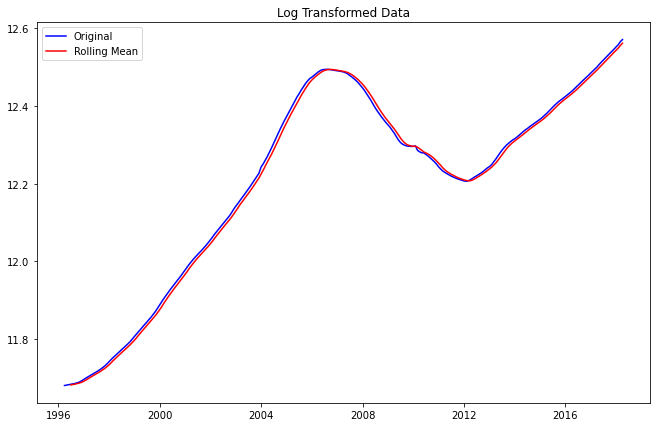

In [18]:
# lets create a log transform so we can substract the rolling mean 
roll_mean = np.log(df_melt).rolling(window=4).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(np.log(df_melt), color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False)

In [19]:
# Subtract the moving average from the log transformed data
data_minus_roll_mean = np.log(df_melt) - roll_mean

# Print the first 10 rows
data_minus_roll_mean.head(10)

,value
time,
1996-04-01,NaN
1996-05-01,NaN
1996-06-01,NaN
1996-07-01,0.001484
1996-08-01,0.001541
1996-09-01,0.001709
1996-10-01,0.002103
1996-11-01,0.002535
1996-12-01,0.003480


In [20]:
data_minus_roll_mean.dropna(inplace=True)

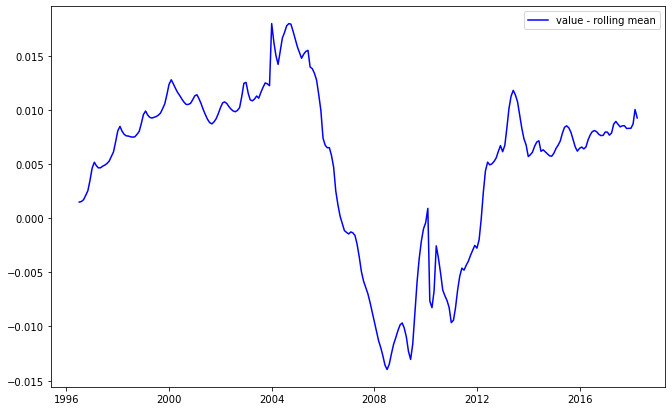

In [21]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean, color='blue',label='value - rolling mean')
plt.legend(loc='best')
plt.show(block=False)

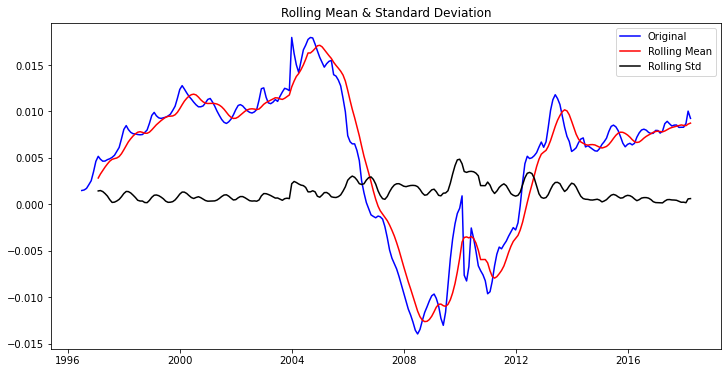

Results of Dickey-Fuller Test: 

Test Statistic                  -2.389565
p-value                          0.144703
#Lags Used                      12.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [22]:
stationarity_check(data_minus_roll_mean)

# Substract the weighted rolling mean 

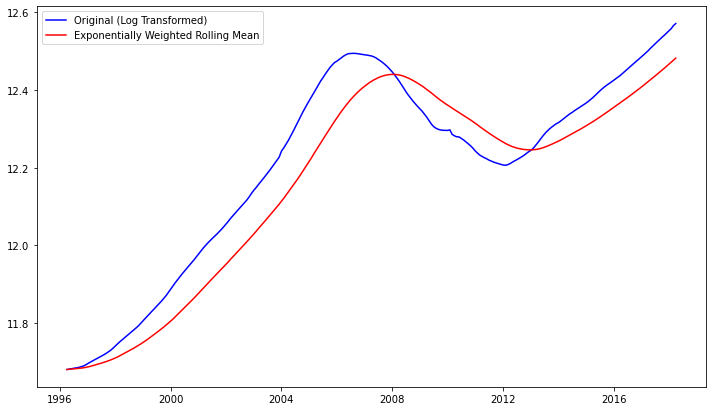

In [23]:
# Calculate Weighted Moving Average of log transformed data, halflife of 12 because it's a year 
exp_roll_mean = np.log(df_melt).ewm(halflife=12).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
plt.plot(np.log(df_melt), color='blue',label='Original (Log Transformed)')
plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.show(block=False)

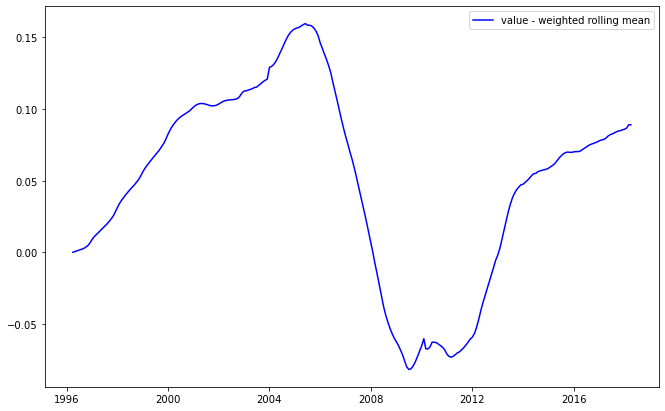

In [24]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_roll_mean = np.log(df_melt) - exp_roll_mean

# Plot the time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean, color='blue',label='value - weighted rolling mean')
plt.legend(loc='best')
plt.show(block=False)

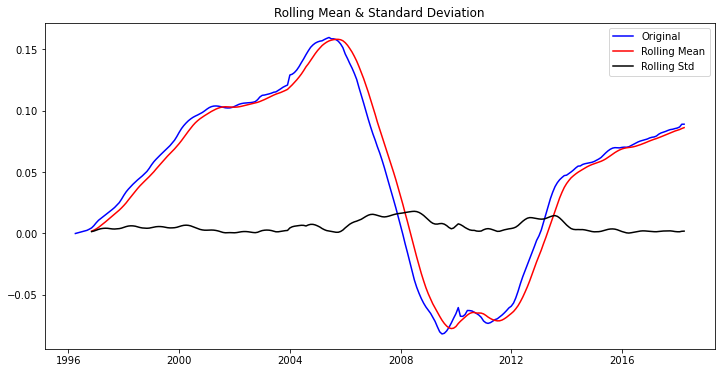

Results of Dickey-Fuller Test: 

Test Statistic                  -2.791301
p-value                          0.059527
#Lags Used                       4.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64


In [26]:
stationarity_check(data_minus_exp_roll_mean)
# p-value is no 0.059! we are getting close, but we can do better 

# Time to difference! 

In [27]:
data_diff = data_minus_exp_roll_mean.diff(periods=12)

# Drop the missing values
data_diff.dropna(inplace=True)

# Check out the first few rows
data_diff.head(15)

,value
time,
1997-04-01,0.013611
1997-05-01,0.014611
1997-06-01,0.015619
1997-07-01,0.016620
1997-08-01,0.017629
1997-09-01,0.018618
1997-10-01,0.019592
1997-11-01,0.020555
1997-12-01,0.021520


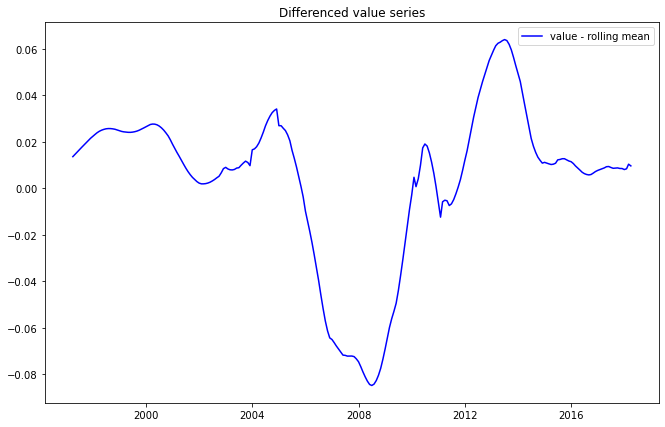

In [28]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='value - rolling mean')
plt.legend(loc='best')
plt.title('Differenced value series')
plt.show(block=False)

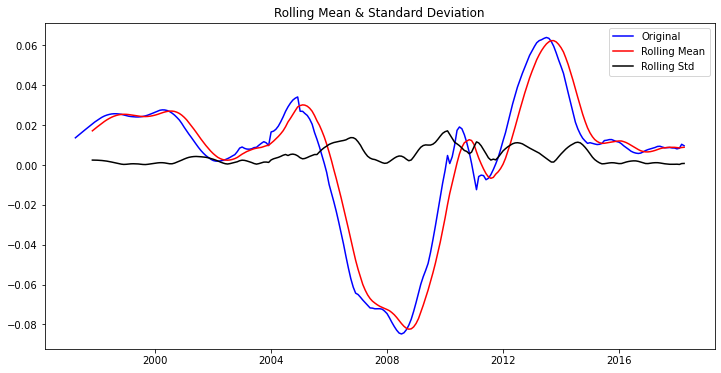

Results of Dickey-Fuller Test: 

Test Statistic                  -2.001545
p-value                          0.285896
#Lags Used                      13.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


In [30]:
stationarity_check(data_diff)
#p-value of .28 --> so that is sig worse than before, so let's look into weighted moving average a bit more 

# Achieving Stationarity 

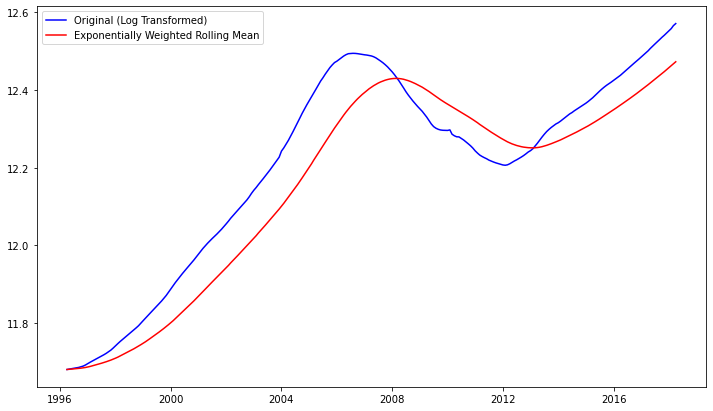

In [34]:
# back to exponetial rolling mean --> lets play with the halflife 

# Calculate Weighted Moving Average of log transformed data, halflife of 12 because it's a year 
exp_roll_mean = np.log(df_melt).ewm(alpha = .05).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
plt.plot(np.log(df_melt), color='blue',label='Original (Log Transformed)')
plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.show(block=False)

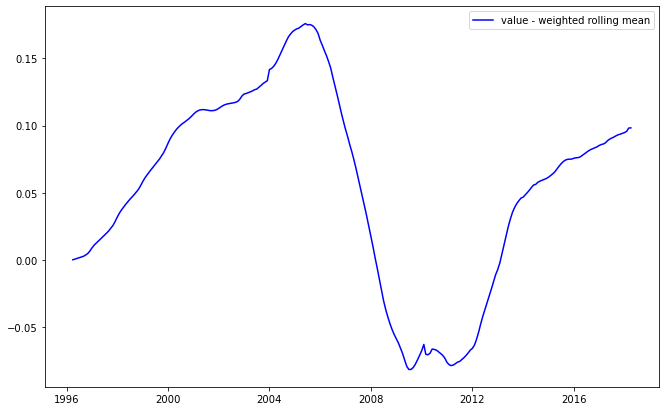

In [35]:
# back to exponetial rolling mean 
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_roll_mean = np.log(df_melt) - exp_roll_mean

# Plot the time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean, color='blue',label='value - weighted rolling mean')
plt.legend(loc='best')
plt.show(block=False)

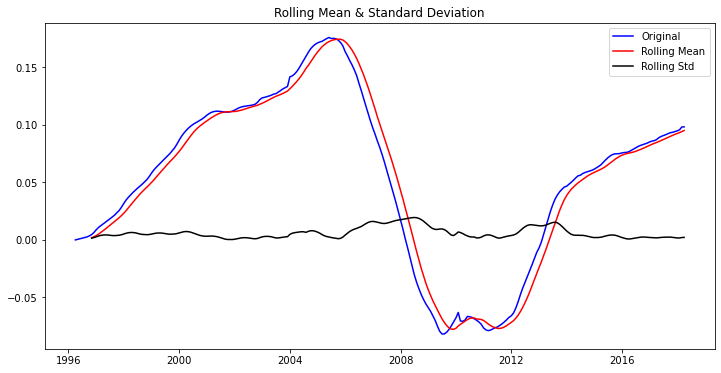

Results of Dickey-Fuller Test: 

Test Statistic                  -2.881003
p-value                          0.047602
#Lags Used                       4.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64


In [36]:
stationarity_check(data_minus_exp_roll_mean)